In [1]:
# Data processing
import os
import pickle
import json
import pandas as pd
import numpy as np
import re

# Viewing
from IPython.display import display

In [2]:
def make_table(results, display_table = True):
    if len(results):
        table = pd.DataFrame({k:[i[1] for i in v] for k, v in results.items()}).T
        table.columns = [(k[0], k[1]+1) for k, v in list(results.items())[0][1]]
        table = table.T
        table.index = pd.MultiIndex.from_tuples(table.index)
        table = table.T
        if display_table:
            display(table.iloc[:, table.columns.get_level_values(1).isin([1,5,10])].round(3))
        return table
    else:
        return {}

# Make figure

In [3]:
def make_plot(all_data, single_data, title='', text_round=2, savefig=False, size=30):
    from matplotlib import pyplot as plt
    import matplotlib
    import seaborn as sns
    
    fontsize = size
    # Make sure fontsize is set
    matplotlib.rcParams.update({'font.size': 3*fontsize})
    
    plt.figure(figsize = (size, size / 2))
    ax = plt.gca()
    
    for name, r in list(all_data.iterrows())[1:]:
        plt.plot(r, marker = 'd', markersize = fontsize, linewidth = fontsize / 3, label = str(name) + "s / all speakers")
    plt.gca().set_prop_cycle(None)
    for name, r in list(single_data.iterrows())[1:]:
        plt.plot(r, marker = 'o', markersize = fontsize, linewidth = fontsize / 3, linestyle = ':', label = str(name) + "s / only host")
        
    #set titles and axis info
#     plt.title(title, fontsize = 20)
    legend = plt.legend(title = "Past / Features used", fontsize = 1.6*fontsize, ncol = 2) # loc="upper left", bbox_to_anchor=(1,1)
    _ = plt.xlabel("Seconds in the future", fontsize = 2*fontsize )
    top = round(max(all_data.max().max(), single_data.max().max()), text_round)
    bottom = round(min(all_data.min().min(), single_data.min().min()), text_round)
    mid = round((top + bottom) / 2., text_round)
    _ = plt.yticks([bottom, mid, top])
    _ = plt.xticks([1, 5, 10])
    plt.ylim(top=top)
    print(bottom, mid, top)
        
    # Format y-axis values
    ax.set_yticklabels([str(int(round(z*100, 0)))+"%" for z in ax.get_yticks()])

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # Make legend fontsize larger
    plt.setp(legend.get_title(),fontsize=2*fontsize)
    
    if savefig:
        plt.savefig("egocom_using_all_features_comparison.pdf", dpi=600, pad_inches=0, bbox_inches = 'tight')
    plt.show()

In [4]:
results = pd.read_csv('nn_training_logs/nn_all_task_scores.csv')

In [5]:
diff = results[results['task'] == 3].sort_values(
    by=['experiment_key', 'include_prior',	'history', 'future'])['test_acc_top_val'].reset_index(drop=True) - \
    results[results['task'] == 2].sort_values(
        by=['experiment_key', 'include_prior',	'history', 'future'])['test_acc_top_val'].reset_index(drop=True)

In [6]:
df_diff = results[results['task'] == 3][['experiment_key', 'include_prior',	'history', 'future']].reset_index(drop=True)
df_diff['diff'] = diff

In [7]:
df_diff.groupby(['experiment_key', 'include_prior'])['diff'].sum().sort_values(ascending=False).head(30)

experiment_key       include_prior
video                False            0.189296
text                 False            0.167776
text_voxaudio        False            0.109685
voxaudio             False            0.073133
text_video_voxaudio  False            0.053350
text_video           False            0.046176
video_voxaudio       False            0.034444
voxaudio             True            -0.301428
text_voxaudio        True            -0.311001
text                 True            -0.318073
video_voxaudio       True            -0.319605
text_video_voxaudio  True            -0.323017
text_video           True            -0.361061
video                True            -0.438934
Name: diff, dtype: float64

In [8]:
results['experiment_key'].unique()

array(['text', 'text_video', 'text_video_voxaudio', 'text_voxaudio',
       'video', 'video_voxaudio', 'voxaudio'], dtype=object)

text_voxaudio
0.5 0.59 0.68


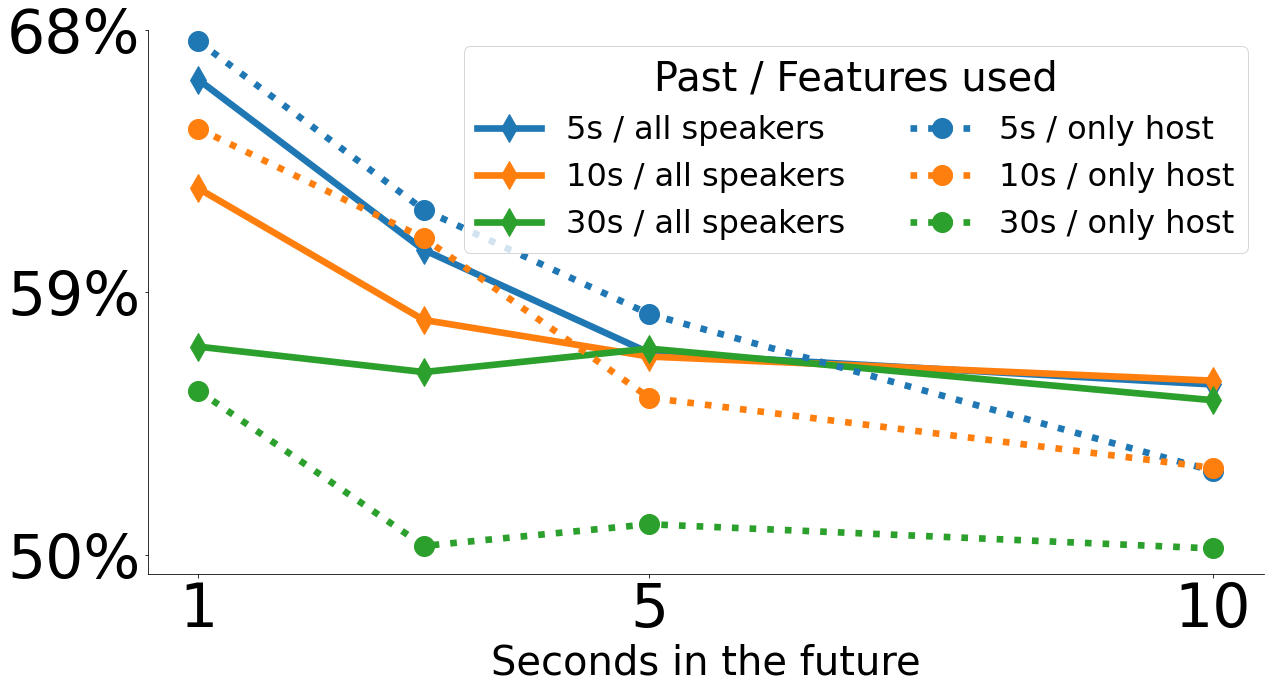

Caption: Test accuracy predicting whether the host will be speaking in X seconds using audio, video, and text features. As you predict further into the future, accuracy increases when all participants features are used versus just the host's. A Guassian naive bayes model was used.


In [9]:
feat = 'text_voxaudio'
print(feat)
filt = (results['experiment_key'] == feat) & (results['include_prior'] == False)
all_data = results[(results['task'] == 3) & filt]
single_data = results[(results['task'] == 2 ) & filt]
# Re-format
all_data = pd.concat([pd.DataFrame(pd.Series(z[['future', 'test_acc_top_val']].set_index('future')['test_acc_top_val'], name=i)).T for i,z in all_data.groupby('history')])
single_data = pd.concat([pd.DataFrame(pd.Series(z[['future', 'test_acc_top_val']].set_index('future')['test_acc_top_val'], name=i)).T for i,z in single_data.groupby('history')])
make_plot(all_data, single_data, savefig=True, size=20)
print('Caption: Test accuracy predicting whether the host will be speaking in X seconds using audio, video, and text features. As you predict further into the future, accuracy increases when all participants features are used versus just the host\'s. A Guassian naive bayes model was used.')

# Old data below here -- all the binary results for the ablation study with logreg and naive bayes)

In [10]:
# Prepare data for plot
all_results = {"use_crossval: False | use_all_perspectives: True | predict_only_host: True | clf: <class 'sklearn.naive_bayes.GaussianNB'>": {4: [(('text',     0),    0.6234794361845917),   (('text', 2), 0.5829943831105946),   (('text', 4), 0.5665436176413444),   (('text', 9), 0.539455649109066),   (('video', 0), 0.5514578103881058),   (('video', 2), 0.536897152818129),   (('video', 4), 0.534874684282106),   (('video', 9), 0.5337771685921284),   (('voxaudio', 0), 0.6481946321683723),   (('voxaudio', 2), 0.5953902769707534),   (('voxaudio', 4), 0.5686807849232562),   (('voxaudio', 9), 0.5402388878010573),   (('text_video', 0), 0.5945163158910987),   (('text_video', 2), 0.5614952546968817),   (('text_video', 4), 0.555469205362347),   (('text_video', 9), 0.5435676522420207),   (('text_voxaudio', 0), 0.6570766557250435),   (('text_voxaudio', 2), 0.5990703079604881),   (('text_voxaudio', 4), 0.5811152127452885),   (('text_voxaudio', 9), 0.5461131779909928),   (('video_voxaudio', 0), 0.6346785093647422),   (('video_voxaudio', 2), 0.5814448963780747),   (('video_voxaudio', 4), 0.5686807849232562),   (('video_voxaudio', 9), 0.5615821421578227),   (('text_video_voxaudio', 0), 0.6420158331724272),   (('text_video_voxaudio', 2), 0.590548130931629),   (('text_video_voxaudio', 4), 0.5772294540509034),   (('text_video_voxaudio', 9), 0.5611905228118269)],  5: [(('text', 0), 0.6183473389355743),   (('text', 2), 0.5660112359550562),   (('text', 4), 0.5521126760563381),   (('text', 9), 0.5132978723404256),   (('video', 0), 0.5689775910364145),   (('video', 2), 0.5626755617977528),   (('video', 4), 0.5619718309859155),   (('video', 9), 0.5606382978723404),   (('voxaudio', 0), 0.6411064425770309),   (('voxaudio', 2), 0.5935744382022472),   (('voxaudio', 4), 0.5732394366197183),   (('voxaudio', 9), 0.5452127659574468),   (('text_video', 0), 0.601890756302521),   (('text_video', 2), 0.5784761235955056),   (('text_video', 4), 0.5767605633802817),   (('text_video', 9), 0.5695035460992908),   (('text_voxaudio', 0), 0.6502100840336135),   (('text_voxaudio', 2), 0.598314606741573),   (('text_voxaudio', 4), 0.5765845070422535),   (('text_voxaudio', 9), 0.5427304964539007),   (('video_voxaudio', 0), 0.6260504201680672),   (('video_voxaudio', 2), 0.5953300561797753),   (('video_voxaudio', 4), 0.5802816901408451),   (('video_voxaudio', 9), 0.573936170212766),   (('text_video_voxaudio', 0), 0.6391806722689075),   (('text_video_voxaudio', 2), 0.6014747191011236),   (('text_video_voxaudio', 4), 0.5894366197183099),   (('text_video_voxaudio', 9), 0.573758865248227)],  10: [(('text', 0), 0.578984485190409),   (('text', 2), 0.5477369165487977),   (('text', 4), 0.5342198581560283),   (('text', 9), 0.5141071428571429),   (('video', 0), 0.5756346967559943),   (('video', 2), 0.570898161244696),   (('video', 4), 0.5656028368794326),   (('video', 9), 0.54625),   (('voxaudio', 0), 0.6126586741889986),   (('voxaudio', 2), 0.579031117397454),   (('voxaudio', 4), 0.5668439716312057),   (('voxaudio', 9), 0.55375),   (('text_video', 0), 0.6004936530324401),   (('text_video', 2), 0.5774398868458275),   (('text_video', 4), 0.574645390070922),   (('text_video', 9), 0.5510714285714285),   (('text_voxaudio', 0), 0.6140691114245416),   (('text_voxaudio', 2), 0.5756718528995757),   (('text_voxaudio', 4), 0.5641843971631205),   (('text_voxaudio', 9), 0.54625),   (('video_voxaudio', 0), 0.610543018335684),   (('video_voxaudio', 2), 0.5868104667609618),   (('video_voxaudio', 4), 0.5822695035460993),   (('video_voxaudio', 9), 0.5682142857142857),   (('text_video_voxaudio', 0), 0.6160084626234132),   (('text_video_voxaudio', 2), 0.5885785007072136),   (('text_video_voxaudio', 4), 0.5856382978723405),   (('text_video_voxaudio', 9), 0.5716071428571429)],  30: [(('text', 0), 0.5665820029027576),   (('text', 2), 0.5598617176128093),   (('text', 4), 0.5505474452554745),   (('text', 9), 0.5303308823529411),   (('video', 0), 0.5609579100145138),   (('video', 2), 0.5576783114992722),   (('video', 4), 0.5525547445255474),   (('video', 9), 0.546875),   (('voxaudio', 0), 0.5809143686502177),   (('voxaudio', 2), 0.5589519650655022),   (('voxaudio', 4), 0.5572992700729927),   (('voxaudio', 9), 0.5466911764705882),   (('text_video', 0), 0.5732946298984035),   (('text_video', 2), 0.5633187772925764),   (('text_video', 4), 0.5565693430656934),   (('text_video', 9), 0.5479779411764706),   (('text_voxaudio', 0), 0.5725689404934688),   (('text_voxaudio', 2), 0.5540393013100436),   (('text_voxaudio', 4), 0.5516423357664234),   (('text_voxaudio', 9), 0.5347426470588236),   (('video_voxaudio', 0), 0.5792815674891146),   (('video_voxaudio', 2), 0.5680494905385735),   (('video_voxaudio', 4), 0.5602189781021898),   (('video_voxaudio', 9), 0.5582720588235294),   (('text_video_voxaudio', 0), 0.5820029027576198),   (('text_video_voxaudio', 2), 0.5722343522561864),   (('text_video_voxaudio', 4), 0.5638686131386861),   (('text_video_voxaudio', 9), 0.5512867647058823)]}, "use_crossval: False | use_all_perspectives: False | predict_only_host: False | clf: <class 'sklearn.naive_bayes.GaussianNB'>": {4: [(('text',     0),    0.6452951346011361),   (('text', 2), 0.5723270440251572),   (('text', 4), 0.5716697284146766),   (('text', 9), 0.551296786767278),   (('video', 0), 0.5657199308471228),   (('video', 2), 0.5463279354231665),   (('video', 4), 0.5419790477136189),   (('video', 9), 0.5399030533206737),   (('voxaudio', 0), 0.6749320819955544),   (('voxaudio', 2), 0.6355172584559006),   (('voxaudio', 4), 0.6221637455935654),   (('voxaudio', 9), 0.6089650692119334),   (('text_video', 0), 0.62904420844653),   (('text_video', 2), 0.5894616946466598),   (('text_video', 4), 0.5778759743806167),   (('text_video', 9), 0.5564939283394134),   (('text_voxaudio', 0), 0.6722647567300568),   (('text_voxaudio', 2), 0.6107066805328579),   (('text_voxaudio', 4), 0.6065240057593962),   (('text_voxaudio', 9), 0.5909749637699265),   (('video_voxaudio', 0), 0.6466287972338849),   (('video_voxaudio', 2), 0.6116476006536918),   (('video_voxaudio', 4), 0.5970408619234397),   (('video_voxaudio', 9), 0.576582879416321),   (('text_video_voxaudio', 0), 0.6637194368979995),   (('text_video_voxaudio', 2), 0.6155103253602734),   (('text_video_voxaudio', 4), 0.604885556824388),   (('text_video_voxaudio', 9), 0.5822797461396232)],  5: [(('text', 0), 0.6498554913294797),   (('text', 2), 0.6086536604210933),   (('text', 4), 0.5914988381099923),   (('text', 9), 0.5682061775309364),   (('video', 0), 0.5648843930635838),   (('video', 2), 0.5517191423604404),   (('video', 4), 0.5476374903175832),   (('video', 9), 0.5464289194192731),   (('voxaudio', 0), 0.6700385356454721),   (('voxaudio', 2), 0.6368553216148348),   (('voxaudio', 4), 0.6249515879163439),   (('voxaudio', 9), 0.6140017538731365),   (('text_video', 0), 0.6205202312138728),   (('text_video', 2), 0.5928626617732278),   (('text_video', 4), 0.5784759876065065),   (('text_video', 9), 0.5630907142161161),   (('text_voxaudio', 0), 0.6660404624277456),   (('text_voxaudio', 2), 0.6283079003283755),   (('text_voxaudio', 4), 0.6132358636715725),   (('text_voxaudio', 9), 0.591688590080873),   (('video_voxaudio', 0), 0.6435452793834296),   (('video_voxaudio', 2), 0.6117442534286266),   (('video_voxaudio', 4), 0.5979376452362509),   (('video_voxaudio', 9), 0.5822858813212511),   (('text_video_voxaudio', 0), 0.6624277456647398),   (('text_video_voxaudio', 2), 0.6268591848560943),   (('text_video_voxaudio', 4), 0.6103795507358637),   (('text_video_voxaudio', 9), 0.5895449673584722)],  10: [(('text', 0), 0.5935046049442559),   (('text', 2), 0.5626397123141219),   (('text', 4), 0.5499853843905291),   (('text', 9), 0.4525887428907629),   (('video', 0), 0.5523994183228308),   (('video', 2), 0.5373214112158616),   (('video', 4), 0.5342005261619409),   (('video', 9), 0.5295646205138262),   (('voxaudio', 0), 0.6484730974309258),   (('voxaudio', 2), 0.6339780347944407),   (('voxaudio', 4), 0.6300302055929066),   (('voxaudio', 9), 0.6314963718376152),   (('text_video', 0), 0.5888027144934561),   (('text_video', 2), 0.5645349402274273),   (('text_video', 4), 0.5576829387118776),   (('text_video', 9), 0.5395665816826829),   (('text_voxaudio', 0), 0.6113427047988367),   (('text_voxaudio', 2), 0.5836816017105647),   (('text_voxaudio', 4), 0.5723959855792653),   (('text_voxaudio', 9), 0.5500098058442832),   (('video_voxaudio', 0), 0.6206010664081435),   (('video_voxaudio', 2), 0.6008358441053553),   (('video_voxaudio', 4), 0.5911039657020365),   (('video_voxaudio', 9), 0.5808491861149245),   (('text_video_voxaudio', 0), 0.6283082888996607),   (('text_video_voxaudio', 2), 0.600155505880066),   (('text_video_voxaudio', 4), 0.5913475591932184),   (('text_video_voxaudio', 9), 0.5694744067464209)],  30: [(('text', 0), 0.4972650422675286),   (('text', 2), 0.4849935187954931),   (('text', 4), 0.4789063281015695),   (('text', 9), 0.4606560676192393),   (('video', 0), 0.5436101442068623),   (('video', 2), 0.5328547213082062),   (('video', 4), 0.5358392482255323),   (('video', 9), 0.5361742805393439),   (('voxaudio', 0), 0.6586772749875683),   (('voxaudio', 2), 0.6546016551999202),   (('voxaudio', 4), 0.6517544736579026),   (('voxaudio', 9), 0.6398671764942644),   (('text_video', 0), 0.5501740427647936),   (('text_video', 2), 0.5341509622095921),   (('text_video', 4), 0.5299410176946916),   (('text_video', 9), 0.5191185349164822),   (('text_voxaudio', 0), 0.5317752362008951),   (('text_voxaudio', 2), 0.5219862399042776),   (('text_voxaudio', 4), 0.5228431470558832),   (('text_voxaudio', 9), 0.5329040048299457),   (('video_voxaudio', 0), 0.6037792143212333),   (('video_voxaudio', 2), 0.5998105494067205),   (('video_voxaudio', 4), 0.5993202039388184),   (('video_voxaudio', 9), 0.5982592070839203),   (('text_video_voxaudio', 0), 0.5816011934361014),   (('text_video_voxaudio', 2), 0.5676039485492073),   (('text_video_voxaudio', 4), 0.5645306408077577),   (('text_video_voxaudio', 9), 0.5621352384785672)]}, "use_crossval: False | use_all_perspectives: False | predict_only_host: True | clf: <class 'sklearn.naive_bayes.GaussianNB'>": {4: [(('text',     0),    0.6529232400901498),   (('text', 2), 0.6116943521594684),   (('text', 4), 0.5946449980018649),   (('text', 9), 0.5714285714285714),   (('video', 0), 0.5438154580405674),   (('video', 2), 0.5217275747508305),   (('video', 4), 0.5180498201678434),   (('video', 9), 0.5158134548378451),   (('voxaudio', 0), 0.6604799151531221),   (('voxaudio', 2), 0.6151495016611296),   (('voxaudio', 4), 0.5973091781004396),   (('voxaudio', 9), 0.5733047440364514),   (('text_video', 0), 0.5990985019223121),   (('text_video', 2), 0.5553488372093023),   (('text_video', 4), 0.5504196083655255),   (('text_video', 9), 0.5336370946127044),   (('text_voxaudio', 0), 0.6620707941137478),   (('text_voxaudio', 2), 0.6200664451827242),   (('text_voxaudio', 4), 0.605568136406021),   (('text_voxaudio', 9), 0.5755829536317342),   (('video_voxaudio', 0), 0.6476203102213973),   (('video_voxaudio', 2), 0.598671096345515),   (('video_voxaudio', 4), 0.5737311842280538),   (('video_voxaudio', 9), 0.5532028946663093),   (('text_video_voxaudio', 0), 0.6554421317778072),   (('text_video_voxaudio', 2), 0.6104983388704319),   (('text_video_voxaudio', 4), 0.596110297056081),   (('text_video_voxaudio', 9), 0.5682122755293487)],  5: [(('text', 0), 0.6466684364215556),   (('text', 2), 0.6101649813730707),   (('text', 4), 0.588957055214724),   (('text', 9), 0.5209982557359453),   (('video', 0), 0.5342447571011415),   (('video', 2), 0.518493879723257),   (('video', 4), 0.5194718591624433),   (('video', 9), 0.5196565141553737),   (('voxaudio', 0), 0.6506503849216884),   (('voxaudio', 2), 0.6113624268227781),   (('voxaudio', 4), 0.5921579087756735),   (('voxaudio', 9), 0.5701059975848651),   (('text_video', 0), 0.5914520838863817),   (('text_video', 2), 0.55401809473124),   (('text_video', 4), 0.5505468124833289),   (('text_video', 9), 0.5320005366966323),   (('text_voxaudio', 0), 0.6531722856384391),   (('text_voxaudio', 2), 0.6137573177221927),   (('text_voxaudio', 4), 0.5956255001333689),   (('text_voxaudio', 9), 0.5718502616396082),   (('video_voxaudio', 0), 0.6359171754711972),   (('video_voxaudio', 2), 0.5882118147951038),   (('video_voxaudio', 4), 0.5686849826620433),   (('video_voxaudio', 9), 0.5455521266604052),   (('text_video_voxaudio', 0), 0.6509158481550306),   (('text_video_voxaudio', 2), 0.6094997339010112),   (('text_video_voxaudio', 4), 0.5878901040277408),   (('text_video_voxaudio', 9), 0.5639339863142359)],  10: [(('text', 0), 0.6067565763119241),   (('text', 2), 0.5819836701914067),   (('text', 4), 0.5693009526365223),   (('text', 9), 0.5295626349892009),   (('video', 0), 0.5219655494725598),   (('video', 2), 0.5170659884888235),   (('video', 4), 0.511471890513887),   (('video', 9), 0.5024298056155507),   (('voxaudio', 0), 0.6263853652022967),   (('voxaudio', 2), 0.5971088207736581),   (('voxaudio', 4), 0.5840601100228096),   (('voxaudio', 9), 0.5599352051835853),   (('text_video', 0), 0.5589531312591801),   (('text_video', 2), 0.5347343059831348),   (('text_video', 4), 0.5211324298940024),   (('text_video', 9), 0.5067494600431965),   (('text_voxaudio', 0), 0.6305247696621712),   (('text_voxaudio', 2), 0.5993842859055013),   (('text_voxaudio', 4), 0.5847309808130954),   (('text_voxaudio', 9), 0.5592602591792657),   (('video_voxaudio', 0), 0.5807183869675524),   (('video_voxaudio', 2), 0.5486547985544104),   (('video_voxaudio', 4), 0.5338789749094325),   (('video_voxaudio', 9), 0.5133639308855291),   (('text_video_voxaudio', 0), 0.6189077313392977),   (('text_video_voxaudio', 2), 0.580779012180431),   (('text_video_voxaudio', 4), 0.5670199919495506),   (('text_video_voxaudio', 9), 0.5267278617710583)],  30: [(('text', 0), 0.566835408400602),   (('text', 2), 0.5506789192154711),   (('text', 4), 0.5495668912415784),   (('text', 9), 0.5355561704482568),   (('video', 0), 0.5097824599808455),   (('video', 2), 0.5052804827869977),   (('video', 4), 0.5024061597690087),   (('video', 9), 0.5051189817376868),   (('voxaudio', 0), 0.5792858120125872),   (('voxaudio', 2), 0.5560279797010013),   (('voxaudio', 4), 0.5484669324900316),   (('voxaudio', 9), 0.5444106253458771),   (('text_video', 0), 0.5363250786701327),   (('text_video', 2), 0.5155671375668632),   (('text_video', 4), 0.5083184380585728),   (('text_video', 9), 0.5019369120088545),   (('text_voxaudio', 0), 0.5846216992748666),   (('text_voxaudio', 2), 0.562885749554245),   (('text_voxaudio', 4), 0.5580915715660663),   (('text_voxaudio', 9), 0.5462091864969563),   (('video_voxaudio', 0), 0.5359146258038036),   (('video_voxaudio', 2), 0.5150185159786037),   (('video_voxaudio', 4), 0.5099683761858931),   (('video_voxaudio', 9), 0.5023519645821805),   (('text_video_voxaudio', 0), 0.5709399370638938),   (('text_video_voxaudio', 2), 0.5372376903031134),   (('text_video_voxaudio', 4), 0.5195930152619277),   (('text_video_voxaudio', 9), 0.5005534034311012)]}, "use_crossval: False | use_all_perspectives: True | predict_only_host: True | clf: <class 'sklearn.ensemble.forest.RandomForestClassifier'>": {4: [(('text',     0),    0.6539872562270709),   (('text', 2), 0.5961650203370134),   (('text', 4), 0.5805323489411307),   (('text', 9), 0.5490503230859605),   (('video', 0), 0.5864066422089207),   (('video', 2), 0.5649815998450514),   (('video', 4), 0.5490577035166117),   (('video', 9), 0.5392598394360681),   (('voxaudio', 0), 0.6472291948252559),   (('voxaudio', 2), 0.5930660468719736),   (('voxaudio', 4), 0.5748979988342724),   (('voxaudio', 9), 0.558449187389857),   (('text_video', 0), 0.6460706700135161),   (('text_video', 2), 0.5963587061785783),   (('text_video', 4), 0.5745094229648339),   (('text_video', 9), 0.5421969845310358),   (('text_voxaudio', 0), 0.6566904807877969),   (('text_voxaudio', 2), 0.6029440247917878),   (('text_voxaudio', 4), 0.5758694385078686),   (('text_voxaudio', 9), 0.5533581358919131),   (('video_voxaudio', 0), 0.653407993821201),   (('video_voxaudio', 2), 0.5979081929110982),   (('video_voxaudio', 4), 0.5702350884010103),   (('video_voxaudio', 9), 0.5568827100058743),   (('text_video_voxaudio', 0), 0.6441397953272833),   (('text_video_voxaudio', 2), 0.6048808832074375),   (('text_video_voxaudio', 4), 0.5733436953565184),   (('text_video_voxaudio', 9), 0.5578617583708635)],  5: [(('text', 0), 0.6465336134453782),   (('text', 2), 0.5967345505617978),   (('text', 4), 0.5725352112676056),   (('text', 9), 0.5574468085106383),   (('video', 0), 0.5835084033613446),   (('video', 2), 0.570751404494382),   (('video', 4), 0.5670774647887324),   (('video', 9), 0.5585106382978723),   (('voxaudio', 0), 0.6414565826330533),   (('voxaudio', 2), 0.6004213483146067),   (('voxaudio', 4), 0.5746478873239437),   (('voxaudio', 9), 0.5570921985815603),   (('text_video', 0), 0.6376050420168067),   (('text_video', 2), 0.5969101123595506),   (('text_video', 4), 0.5806338028169014),   (('text_video', 9), 0.5585106382978723),   (('text_voxaudio', 0), 0.6475840336134454),   (('text_voxaudio', 2), 0.6053370786516854),   (('text_voxaudio', 4), 0.585387323943662),   (('text_voxaudio', 9), 0.5593971631205674),   (('video_voxaudio', 0), 0.6432072829131653),   (('video_voxaudio', 2), 0.5956811797752809),   (('video_voxaudio', 4), 0.5748239436619719),   (('video_voxaudio', 9), 0.5539007092198581),   (('text_video_voxaudio', 0), 0.6465336134453782),   (('text_video_voxaudio', 2), 0.601123595505618),   (('text_video_voxaudio', 4), 0.5737676056338028),   (('text_video_voxaudio', 9), 0.5585106382978723)],  10: [(('text', 0), 0.6216502115655853),   (('text', 2), 0.5795615275813296),   (('text', 4), 0.5627659574468085),   (('text', 9), 0.5480357142857143),   (('video', 0), 0.590620592383639),   (('video', 2), 0.5694837340876945),   (('video', 4), 0.5666666666666667),   (('video', 9), 0.5523214285714285),   (('voxaudio', 0), 0.6167136812411848),   (('voxaudio', 2), 0.5815063649222065),   (('voxaudio', 4), 0.5732269503546099),   (('voxaudio', 9), 0.5582142857142857),   (('text_video', 0), 0.6100141043723555),   (('text_video', 2), 0.5781471004243282),   (('text_video', 4), 0.5673758865248227),   (('text_video', 9), 0.5521428571428572),   (('text_voxaudio', 0), 0.6242947813822285),   (('text_voxaudio', 2), 0.5949434229137199),   (('text_voxaudio', 4), 0.5762411347517731),   (('text_voxaudio', 9), 0.5592857142857143),   (('video_voxaudio', 0), 0.6174188998589563),   (('video_voxaudio', 2), 0.5848656294200849),   (('video_voxaudio', 4), 0.5776595744680851),   (('video_voxaudio', 9), 0.5623214285714285),   (('text_video_voxaudio', 0), 0.6161847672778561),   (('text_video_voxaudio', 2), 0.5878712871287128),   (('text_video_voxaudio', 4), 0.5792553191489361),   (('text_video_voxaudio', 9), 0.5655357142857143)],  30: [(('text', 0), 0.5693033381712627),   (('text', 2), 0.5516739446870451),   (('text', 4), 0.5474452554744526),   (('text', 9), 0.5479779411764706),   (('video', 0), 0.5662191582002902),   (('video', 2), 0.5609534206695779),   (('video', 4), 0.5490875912408759),   (('video', 9), 0.5424632352941177),   (('voxaudio', 0), 0.5705732946298984),   (('voxaudio', 2), 0.5591339155749636),   (('voxaudio', 4), 0.5593065693430657),   (('voxaudio', 9), 0.5424632352941177),   (('text_video', 0), 0.5749274310595065),   (('text_video', 2), 0.5587700145560408),   (('text_video', 4), 0.5541970802919708),   (('text_video', 9), 0.5564338235294117),   (('text_voxaudio', 0), 0.5702104499274311),   (('text_voxaudio', 2), 0.5531295487627366),   (('text_voxaudio', 4), 0.5598540145985401),   (('text_voxaudio', 9), 0.5481617647058824),   (('video_voxaudio', 0), 0.579644412191582),   (('video_voxaudio', 2), 0.5684133915574964),   (('video_voxaudio', 4), 0.5534671532846716),   (('video_voxaudio', 9), 0.5367647058823529),   (('text_video_voxaudio', 0), 0.5747460087082729),   (('text_video_voxaudio', 2), 0.5704148471615721),   (('text_video_voxaudio', 4), 0.5574817518248175),   (('text_video_voxaudio', 9), 0.5516544117647059)]}, "use_crossval: False | use_all_perspectives: False | predict_only_host: False | clf: <class 'sklearn.ensemble.forest.RandomForestClassifier'>": {4: [(('text',     0),    0.6985922449987652),   (('text', 2), 0.6741445055217155),   (('text', 4), 0.6656571173228737),   (('text', 9), 0.6512418170006496),   (('video', 0), 0.6558162509261546),   (('video', 2), 0.6499281929381469),   (('video', 4), 0.6475348791023285),   (('video', 9), 0.647044125730848),   (('voxaudio', 0), 0.7197826623857743),   (('voxaudio', 2), 0.6952409250730451),   (('voxaudio', 4), 0.6834814557370538),   (('voxaudio', 9), 0.6702313727449902),   (('text_video', 0), 0.7045690293899728),   (('text_video', 2), 0.6796414599118507),   (('text_video', 4), 0.6708703639342635),   (('text_video', 9), 0.6503423117285493),   (('text_voxaudio', 0), 0.7202272165966905),   (('text_voxaudio', 2), 0.6930619521616401),   (('text_voxaudio', 4), 0.6864604538007051),   (('text_voxaudio', 9), 0.6727799710159412),   (('video_voxaudio', 0), 0.7134107186959743),   (('video_voxaudio', 2), 0.689694448571287),   (('video_voxaudio', 4), 0.6839283054466014),   (('video_voxaudio', 9), 0.6708810154415071),   (('text_video_voxaudio', 0), 0.7176092862435169),   (('text_video_voxaudio', 2), 0.6905363244688754),   (('text_video_voxaudio', 4), 0.6823395064793207),   (('text_video_voxaudio', 9), 0.6734795862275749)],  5: [(('text', 0), 0.6970616570327552),   (('text', 2), 0.6732663704848367),   (('text', 4), 0.6624709527498064),   (('text', 9), 0.6548280229952256),   (('video', 0), 0.6675818882466281),   (('video', 2), 0.6577168244156848),   (('video', 4), 0.6528853601859024),   (('video', 9), 0.6511254019292605),   (('voxaudio', 0), 0.7185934489402698),   (('voxaudio', 2), 0.6979428240293606),   (('voxaudio', 4), 0.6874515879163439),   (('voxaudio', 9), 0.6733411283250511),   (('text_video', 0), 0.7030346820809249),   (('text_video', 2), 0.6834073787908055),   (('text_video', 4), 0.6802381874515879),   (('text_video', 9), 0.6629153269024651),   (('text_voxaudio', 0), 0.7171001926782273),   (('text_voxaudio', 2), 0.6978462429978752),   (('text_voxaudio', 4), 0.6895817195972115),   (('text_voxaudio', 9), 0.6751437201597973),   (('video_voxaudio', 0), 0.7133429672447014),   (('video_voxaudio', 2), 0.6921479621402357),   (('video_voxaudio', 4), 0.6852730441518203),   (('video_voxaudio', 9), 0.6729026600409237),   (('text_video_voxaudio', 0), 0.7160886319845857),   (('text_video_voxaudio', 2), 0.6949971025690554),   (('text_video_voxaudio', 4), 0.685708752904725),   (('text_video_voxaudio', 9), 0.6748026892721426)],  10: [(('text', 0), 0.692195831313621),   (('text', 2), 0.6704247254349305),   (('text', 4), 0.6631102016954107),   (('text', 9), 0.652235732496568),   (('video', 0), 0.6529326223945711),   (('video', 2), 0.6511808727767519),   (('video', 4), 0.6497612783786417),   (('video', 9), 0.6486565993332026),   (('voxaudio', 0), 0.7106156083373728),   (('voxaudio', 2), 0.6960346000583147),   (('voxaudio', 4), 0.6876157069083114),   (('voxaudio', 9), 0.6737105314767602),   (('text_video', 0), 0.6936984973339796),   (('text_video', 2), 0.6765963650500535),   (('text_video', 4), 0.6596511741206275),   (('text_video', 9), 0.6500784467542655),   (('text_voxaudio', 0), 0.709112942317014),   (('text_voxaudio', 2), 0.6964719603460006),   (('text_voxaudio', 4), 0.6856669589788561),   (('text_voxaudio', 9), 0.6750833496764072),   (('video_voxaudio', 0), 0.7064469219583132),   (('video_voxaudio', 2), 0.6894256001555059),   (('video_voxaudio', 4), 0.6824515248952548),   (('video_voxaudio', 9), 0.6682682878995881),   (('text_video_voxaudio', 0), 0.7106640814348036),   (('text_video_voxaudio', 2), 0.6919039751190592),   (('text_video_voxaudio', 4), 0.6860079898665108),   (('text_video_voxaudio', 9), 0.6716022749558737)],  30: [(('text', 0), 0.6658876181004475),   (('text', 2), 0.6523083059128527),   (('text', 4), 0.6493052084374688),   (('text', 9), 0.647967397866774),   (('video', 0), 0.6552958727001492),   (('video', 2), 0.6520091733971483),   (('video', 4), 0.6522543237028892),   (('video', 9), 0.6492251962165425),   (('voxaudio', 0), 0.6872202884137245),   (('voxaudio', 2), 0.6780337022634361),   (('voxaudio', 4), 0.6726482055383385),   (('voxaudio', 9), 0.663614409337895),   (('text_video', 0), 0.6661859771258081),   (('text_video', 2), 0.6595871971283278),   (('text_video', 4), 0.658002599220234),   (('text_video', 9), 0.6545079492855705),   (('text_voxaudio', 0), 0.6894579811039284),   (('text_voxaudio', 2), 0.6811745936783329),   (('text_voxaudio', 4), 0.6743976806957913),   (('text_voxaudio', 9), 0.6663815657073858),   (('video_voxaudio', 0), 0.6819492789656887),   (('video_voxaudio', 2), 0.6795792202612424),   (('video_voxaudio', 4), 0.6737978606418075),   (('video_voxaudio', 9), 0.663211913865969),   (('text_video_voxaudio', 0), 0.6848831427150671),   (('text_video_voxaudio', 2), 0.6779339914248679),   (('text_video_voxaudio', 4), 0.676447065880236),   (('text_video_voxaudio', 9), 0.6611491245723485)]}, "use_crossval: False | use_all_perspectives: False | predict_only_host: True | clf: <class 'sklearn.ensemble.forest.RandomForestClassifier'>": {4: [(('text',     0),    0.6559724247646825),   (('text', 2), 0.6112956810631229),   (('text', 4), 0.5971759690955109),   (('text', 9), 0.5722326454033771),   (('video', 0), 0.609041495426223),   (('video', 2), 0.575548172757475),   (('video', 4), 0.5585453576661782),   (('video', 9), 0.5533369069954436),   (('voxaudio', 0), 0.6692297494365637),   (('voxaudio', 2), 0.6235215946843854),   (('voxaudio', 4), 0.5974423871053683),   (('voxaudio', 9), 0.5767890645939426),   (('text_video', 0), 0.6569004374917141),   (('text_video', 2), 0.6175415282392026),   (('text_video', 4), 0.5997069401891568),   (('text_video', 9), 0.5809434467971053),   (('text_voxaudio', 0), 0.6758584117725043),   (('text_voxaudio', 2), 0.6256478405315614),   (('text_voxaudio', 4), 0.6045024643665912),   (('text_voxaudio', 9), 0.5802733851514339),   (('video_voxaudio', 0), 0.6635290998276547),   (('video_voxaudio', 2), 0.6194019933554817),   (('video_voxaudio', 4), 0.6034367923271613),   (('video_voxaudio', 9), 0.5797373358348968),   (('text_video_voxaudio', 0), 0.6697600424234389),   (('text_video_voxaudio', 2), 0.6256478405315614),   (('text_video_voxaudio', 4), 0.6104968695883842),   (('text_video_voxaudio', 9), 0.588448137228625)],  5: [(('text', 0), 0.6491903371383063),   (('text', 2), 0.6024481106971793),   (('text', 4), 0.5904241130968259),   (('text', 9), 0.5765463571716087),   (('video', 0), 0.6096363153703213),   (('video', 2), 0.5717136774880256),   (('video', 4), 0.55841557748733),   (('video', 9), 0.545417952502348),   (('voxaudio', 0), 0.6645872046721529),   (('voxaudio', 2), 0.6265300691857371),   (('voxaudio', 4), 0.608829021072286),   (('voxaudio', 9), 0.5752046155910372),   (('text_video', 0), 0.6525086275550837),   (('text_video', 2), 0.6152208621607238),   (('text_video', 4), 0.5945585489463857),   (('text_video', 9), 0.5734603515362942),   (('text_voxaudio', 0), 0.6693655428723122),   (('text_voxaudio', 2), 0.6263970196913252),   (('text_voxaudio', 4), 0.6041611096292344),   (('text_voxaudio', 9), 0.5872802898161814),   (('video_voxaudio', 0), 0.661667109105389),   (('video_voxaudio', 2), 0.6193453964874933),   (('video_voxaudio', 4), 0.6002934115764204),   (('video_voxaudio', 9), 0.5836575875486382),   (('text_video_voxaudio', 0), 0.6677727634722591),   (('text_video_voxaudio', 2), 0.6246673762639702),   (('text_video_voxaudio', 4), 0.6041611096292344),   (('text_video_voxaudio', 9), 0.588622031396753)],  10: [(('text', 0), 0.6215783148617973),   (('text', 2), 0.5934948467407308),   (('text', 4), 0.5906346437676103),   (('text', 9), 0.5715442764578834),   (('video', 0), 0.5780478034450528),   (('video', 2), 0.5548119394993977),   (('video', 4), 0.5475647390312626),   (('video', 9), 0.5265928725701944),   (('voxaudio', 0), 0.6418747496327948),   (('voxaudio', 2), 0.6141078838174274),   (('voxaudio', 4), 0.598819267409097),   (('voxaudio', 9), 0.5728941684665226),   (('text_video', 0), 0.631993590599546),   (('text_video', 2), 0.5991165841252845),   (('text_video', 4), 0.5698376492687508),   (('text_video', 9), 0.5322624190064795),   (('text_voxaudio', 0), 0.6490853251435439),   (('text_voxaudio', 2), 0.6189265158613305),   (('text_voxaudio', 4), 0.59962431235744),   (('text_voxaudio', 9), 0.5724892008639308),   (('video_voxaudio', 0), 0.6384029910535453),   (('video_voxaudio', 2), 0.6141078838174274),   (('video_voxaudio', 4), 0.5960016100898967),   (('video_voxaudio', 9), 0.5602051835853131),   (('text_video_voxaudio', 0), 0.6497529710241687),   (('text_video_voxaudio', 2), 0.6099585062240664),   (('text_video_voxaudio', 4), 0.5989534415671541),   (('text_video_voxaudio', 9), 0.5673596112311015)],  30: [(('text', 0), 0.5550690928991654),   (('text', 2), 0.5542449595391579),   (('text', 4), 0.5580915715660663),   (('text', 9), 0.5532650802434975),   (('video', 0), 0.5742235599945273),   (('video', 2), 0.5579481552599095),   (('video', 4), 0.5596040148494431),   (('video', 9), 0.5385998893193138),   (('voxaudio', 0), 0.600492543439595),   (('voxaudio', 2), 0.5840076807022356),   (('voxaudio', 4), 0.5667537467344974),   (('voxaudio', 9), 0.5534034311012729),   (('text_video', 0), 0.6026816253933507),   (('text_video', 2), 0.5962145110410094),   (('text_video', 4), 0.5695036436133645),   (('text_video', 9), 0.5485611510791367),   (('text_voxaudio', 0), 0.6029552606375701),   (('text_voxaudio', 2), 0.5856535454670141),   (('text_voxaudio', 4), 0.5763783858105321),   (('text_voxaudio', 9), 0.5534034311012729),   (('video_voxaudio', 0), 0.5992611848406074),   (('video_voxaudio', 2), 0.5829104375257166),   (('video_voxaudio', 4), 0.5798157569091159),   (('video_voxaudio', 9), 0.5532650802434975),   (('text_video_voxaudio', 0), 0.6009029963059243),   (('text_video_voxaudio', 2), 0.5933342477026471),   (('text_video_voxaudio', 4), 0.5866904991062836),   (('text_video_voxaudio', 9), 0.5539568345323741)]}, "use_crossval: True | use_all_perspectives: True | predict_only_host: True | clf: <class 'sklearn.naive_bayes.GaussianNB'>": {4: [(('text',     0),    0.6495421578279535),   (('text', 2), 0.5878564811484824),   (('text', 4), 0.5533003759881916),   (('text', 9), 0.5189191297826732),   (('video', 0), 0.5192359413820778),   (('video', 2), 0.5051804947521831),   (('video', 4), 0.4972346271973011),   (('video', 9), 0.49625909688412584),   (('voxaudio', 0), 0.6847674467968973),   (('voxaudio', 2), 0.623508876445786),   (('voxaudio', 4), 0.5934301380226243),   (('voxaudio', 9), 0.5547619737142593),   (('text_video', 0), 0.5598077909248287),   (('text_video', 2), 0.5242564040462163),   (('text_video', 4), 0.5126536453371967),   (('text_video', 9), 0.4989114560751437),   (('text_voxaudio', 0), 0.6856497951795943),   (('text_voxaudio', 2), 0.623586628906604),   (('text_voxaudio', 4), 0.5962215354146921),   (('text_voxaudio', 9), 0.5555759631540683),   (('video_voxaudio', 0), 0.6439362344447342),   (('video_voxaudio', 2), 0.5791904546527735),   (('video_voxaudio', 4), 0.5506154899432978),   (('video_voxaudio', 9), 0.5195239039885351),   (('text_video_voxaudio', 0), 0.6570448111602356),   (('text_video_voxaudio', 2), 0.5884028140972526),   (('text_video_voxaudio', 4), 0.5567203312580375),   (('text_video_voxaudio', 9), 0.5212832267605743)],  5: [(('text', 0), 0.6293332682577489),   (('text', 2), 0.5725381480733935),   (('text', 4), 0.5509984628634959),   (('text', 9), 0.5146047308539099),   (('video', 0), 0.5131997544034145),   (('video', 2), 0.5009821759299846),   (('video', 4), 0.49538954697376675),   (('video', 9), 0.48720497403446644),   (('voxaudio', 0), 0.6781307293621237),   (('voxaudio', 2), 0.6240455462862923),   (('voxaudio', 4), 0.5953664608759018),   (('voxaudio', 9), 0.556584695911876),   (('text_video', 0), 0.5485174753508428),   (('text_video', 2), 0.5159269842859872),   (('text_video', 4), 0.5053696658950353),   (('text_video', 9), 0.49167687778685903),   (('text_voxaudio', 0), 0.6758935655362045),   (('text_voxaudio', 2), 0.6219146645590208),   (('text_voxaudio', 4), 0.5929198799364814),   (('text_voxaudio', 9), 0.5542064601463389),   (('video_voxaudio', 0), 0.6367992693470291),   (('video_voxaudio', 2), 0.5803327672389804),   (('video_voxaudio', 4), 0.5515348460754879),   (('video_voxaudio', 9), 0.5148602571679588),   (('text_video_voxaudio', 0), 0.6443497027146645),   (('text_video_voxaudio', 2), 0.5869780437216483),   (('text_video_voxaudio', 4), 0.5575232676128528),   (('text_video_voxaudio', 9), 0.5180867523869178)],  10: [(('text', 0), 0.6178053693988834),   (('text', 2), 0.5818258581896032),   (('text', 4), 0.5585227779257285),   (('text', 9), 0.5312027592742684),   (('video', 0), 0.510017427611629),   (('video', 2), 0.5000424730897097),   (('video', 4), 0.4949456954532815),   (('video', 9), 0.49452904971774253),   (('voxaudio', 0), 0.6384634536644452),   (('voxaudio', 2), 0.598868891473415),   (('voxaudio', 4), 0.5768354206541544),   (('voxaudio', 9), 0.5456873438450707),   (('text_video', 0), 0.5604133805155787),   (('text_video', 2), 0.5263519468901487),   (('text_video', 4), 0.5140485921163134),   (('text_video', 9), 0.5038823293744128),   (('text_voxaudio', 0), 0.6388698291130707),   (('text_voxaudio', 2), 0.5970204153245715),   (('text_voxaudio', 4), 0.5751184652218585),   (('text_voxaudio', 9), 0.5435472004175821),   (('video_voxaudio', 0), 0.605389037026129),   (('video_voxaudio', 2), 0.5620124601398042),   (('video_voxaudio', 4), 0.5398553919339418),   (('video_voxaudio', 9), 0.5178999911351139),   (('text_video_voxaudio', 0), 0.6141996704576366),   (('text_video_voxaudio', 2), 0.5720691790307317),   (('text_video_voxaudio', 4), 0.5493119402730458),   (('text_video_voxaudio', 9), 0.5231664349198406)],  30: [(('text', 0), 0.5786259010933945),   (('text', 2), 0.5620501700560834),   (('text', 4), 0.5459432048681542),   (('text', 9), 0.5281201234374271),   (('video', 0), 0.4919217145786135),   (('video', 2), 0.48577166850293196),   (('video', 4), 0.484370943842948),   (('video', 9), 0.4862690727222514),   (('voxaudio', 0), 0.5708241681394307),   (('voxaudio', 2), 0.5476818879818169),   (('voxaudio', 4), 0.5343189422756695),   (('voxaudio', 9), 0.5137034411128298),   (('text_video', 0), 0.5322858197359758),   (('text_video', 2), 0.5145081748940191),   (('text_video', 4), 0.5062856580242049),   (('text_video', 9), 0.4901602111269184),   (('text_voxaudio', 0), 0.5805626102181413),   (('text_voxaudio', 2), 0.5579727078321679),   (('text_voxaudio', 4), 0.5434962617806927),   (('text_voxaudio', 9), 0.5211499126398458),   (('video_voxaudio', 0), 0.5331987019395331),   (('video_voxaudio', 2), 0.5128989789300309),   (('video_voxaudio', 4), 0.5040330469631348),   (('video_voxaudio', 9), 0.4883124401513572),   (('text_video_voxaudio', 0), 0.5504345663224062),   (('text_video_voxaudio', 2), 0.5306792466098086),   (('text_video_voxaudio', 4), 0.51727122597475),   (('text_video_voxaudio', 9), 0.49497493921464975)]}, "use_crossval: True | use_all_perspectives: False | predict_only_host: False | clf: <class 'sklearn.naive_bayes.GaussianNB'>": {4: [(('text',     0),    0.671555662971522),   (('text', 2), 0.6123672704559651),   (('text', 4), 0.599591738660769),   (('text', 9), 0.5748549256198585),   (('video', 0), 0.5576084483926695),   (('video', 2), 0.5461145607524709),   (('video', 4), 0.542276239221862),   (('video', 9), 0.5310812002880885),   (('voxaudio', 0), 0.7031173301892262),   (('voxaudio', 2), 0.6603813792850057),   (('voxaudio', 4), 0.6436909856762745),   (('voxaudio', 9), 0.625969299650994),   (('text_video', 0), 0.6414308004973109),   (('text_video', 2), 0.6015064114340302),   (('text_video', 4), 0.585388173515563),   (('text_video', 9), 0.5584102798197941),   (('text_voxaudio', 0), 0.6990200529449961),   (('text_voxaudio', 2), 0.643935775434471),   (('text_voxaudio', 4), 0.6280211827849997),   (('text_voxaudio', 9), 0.6061136811592092),   (('video_voxaudio', 0), 0.6645193458483327),   (('video_voxaudio', 2), 0.6246463607304259),   (('video_voxaudio', 4), 0.6089922861517474),   (('video_voxaudio', 9), 0.5845457285507417),   (('text_video_voxaudio', 0), 0.6900486348399804),   (('text_video_voxaudio', 2), 0.6407980306426131),   (('text_video_voxaudio', 4), 0.6231443382952732),   (('text_video_voxaudio', 9), 0.5955040202445318)],  5: [(('text', 0), 0.6768598986991343),   (('text', 2), 0.6358361885295272),   (('text', 4), 0.6157670525686695),   (('text', 9), 0.5903164393472323),   (('video', 0), 0.5497097132219093),   (('video', 2), 0.538431091174597),   (('video', 4), 0.5336887848726968),   (('video', 9), 0.5216805206621352),   (('voxaudio', 0), 0.6997071686488399),   (('voxaudio', 2), 0.6626996172497414),   (('voxaudio', 4), 0.6455940272865319),   (('voxaudio', 9), 0.6282407319458313),   (('text_video', 0), 0.6193035772083382),   (('text_video', 2), 0.5861956819922309),   (('text_video', 4), 0.5717011667920494),   (('text_video', 9), 0.54240555986723),   (('text_voxaudio', 0), 0.6949345463957047),   (('text_voxaudio', 2), 0.6543679143796668),   (('text_voxaudio', 4), 0.6347353029760334),   (('text_voxaudio', 9), 0.6090486509604645),   (('video_voxaudio', 0), 0.6533998675490608),   (('video_voxaudio', 2), 0.618162936158367),   (('video_voxaudio', 4), 0.6015280675745843),   (('video_voxaudio', 9), 0.5752786693449676),   (('text_video_voxaudio', 0), 0.678201085546779),   (('text_video_voxaudio', 2), 0.6368692326877674),   (('text_video_voxaudio', 4), 0.6169705213430655),   (('text_video_voxaudio', 9), 0.5841696274003094)],  10: [(('text', 0), 0.5811783428377613),   (('text', 2), 0.523266273394551),   (('text', 4), 0.49142406670047645),   (('text', 9), 0.45736721161926097),   (('video', 0), 0.5408929586124918),   (('video', 2), 0.530378690668295),   (('video', 4), 0.5250830214934218),   (('video', 9), 0.5182381968600402),   (('voxaudio', 0), 0.6798408298789592),   (('voxaudio', 2), 0.6582110517150042),   (('voxaudio', 4), 0.6497171748639153),   (('voxaudio', 9), 0.6374654655431622),   (('text_video', 0), 0.5767013863623583),   (('text_video', 2), 0.552737957725175),   (('text_video', 4), 0.5395351125560695),   (('text_video', 9), 0.5185697731498239),   (('text_voxaudio', 0), 0.642117552145183),   (('text_voxaudio', 2), 0.6137364720771329),   (('text_voxaudio', 4), 0.5982409382357182),   (('text_voxaudio', 9), 0.5687714464323997),   (('video_voxaudio', 0), 0.6347275506172159),   (('video_voxaudio', 2), 0.6115731744271695),   (('video_voxaudio', 4), 0.5986092994389285),   (('video_voxaudio', 9), 0.5819537627177971),   (('text_video_voxaudio', 0), 0.6386857835879949),   (('text_video_voxaudio', 2), 0.6098677277725841),   (('text_video_voxaudio', 4), 0.5930889724087021),   (('text_video_voxaudio', 9), 0.5651757764826092)],  30: [(('text', 0), 0.5229911514822895),   (('text', 2), 0.5063262187497839),   (('text', 4), 0.49713388955774623),   (('text', 9), 0.4801891871949933),   (('video', 0), 0.5305670958281145),   (('video', 2), 0.5242317016369821),   (('video', 4), 0.5226766517726793),   (('video', 9), 0.5208450345767573),   (('voxaudio', 0), 0.6571161993204042),   (('voxaudio', 2), 0.6512731066345603),   (('voxaudio', 4), 0.6473285816123214),   (('voxaudio', 9), 0.6398188130665725),   (('text_video', 0), 0.552516997540663),   (('text_video', 2), 0.5344939702512123),   (('text_video', 4), 0.527451718677359),   (('text_video', 9), 0.5162805620124757),   (('text_voxaudio', 0), 0.565832251054358),   (('text_voxaudio', 2), 0.5562060298449196),   (('text_voxaudio', 4), 0.5529697529402194),   (('text_voxaudio', 9), 0.5563478781742364),   (('video_voxaudio', 0), 0.6093084253641647),   (('video_voxaudio', 2), 0.6045274376866789),   (('video_voxaudio', 4), 0.6015183879038801),   (('video_voxaudio', 9), 0.5949912370783761),   (('text_video_voxaudio', 0), 0.5824986991977159),   (('text_video_voxaudio', 2), 0.5704493027120277),   (('text_video_voxaudio', 4), 0.5656089226061074),   (('text_video_voxaudio', 9), 0.5629714896852759)]}, "use_crossval: True | use_all_perspectives: False | predict_only_host: True | clf: <class 'sklearn.naive_bayes.GaussianNB'>": {4: [(('text',     0),    0.6622354344086439),   (('text', 2), 0.6142788698789332),   (('text', 4), 0.5923248634569396),   (('text', 9), 0.5455600786798769),   (('video', 0), 0.5240508663618886),   (('video', 2), 0.5090461351094048),   (('video', 4), 0.49847979645342244),   (('video', 9), 0.4894046457326583),   (('voxaudio', 0), 0.6771201317494551),   (('voxaudio', 2), 0.6203176995184589),   (('voxaudio', 4), 0.5945618302074402),   (('voxaudio', 9), 0.5617720058872255),   (('text_video', 0), 0.5821584791200417),   (('text_video', 2), 0.5398112164970759),   (('text_video', 4), 0.5205604797468495),   (('text_video', 9), 0.49861578594143746),   (('text_voxaudio', 0), 0.6760991881133678),   (('text_voxaudio', 2), 0.6201332567538473),   (('text_voxaudio', 4), 0.5955056682549278),   (('text_voxaudio', 9), 0.563589632928027),   (('video_voxaudio', 0), 0.6485759811538749),   (('video_voxaudio', 2), 0.5886099146338433),   (('video_voxaudio', 4), 0.5589765688518213),   (('video_voxaudio', 9), 0.5223868888140804),   (('text_video_voxaudio', 0), 0.6583969287919709),   (('text_video_voxaudio', 2), 0.5982510696875998),   (('text_video_voxaudio', 4), 0.5694424937237746),   (('text_video_voxaudio', 9), 0.5298219674420256)],  5: [(('text', 0), 0.6535871545054965),   (('text', 2), 0.6111295208590596),   (('text', 4), 0.568993791104759),   (('text', 9), 0.520637014787835),   (('video', 0), 0.5260404266999892),   (('video', 2), 0.5069270990076472),   (('video', 4), 0.49768385549275845),   (('video', 9), 0.47967816202561026),   (('voxaudio', 0), 0.6666801714114434),   (('voxaudio', 2), 0.6167046371470442),   (('voxaudio', 4), 0.591227209178731),   (('voxaudio', 9), 0.559156959378497),   (('text_video', 0), 0.582291906102476),   (('text_video', 2), 0.5430826146473824),   (('text_video', 4), 0.5248602419559717),   (('text_video', 9), 0.4975638683983908),   (('text_voxaudio', 0), 0.6663066606981422),   (('text_voxaudio', 2), 0.616184648814588),   (('text_voxaudio', 4), 0.5916235792500611),   (('text_voxaudio', 9), 0.5606056614539958),   (('video_voxaudio', 0), 0.6390827744407732),   (('video_voxaudio', 2), 0.5866435380202816),   (('video_voxaudio', 4), 0.559461187570421),   (('video_voxaudio', 9), 0.520403441325134),   (('text_video_voxaudio', 0), 0.6467601325036558),   (('text_video_voxaudio', 2), 0.593987064747505),   (('text_video_voxaudio', 4), 0.5689512043585678),   (('text_video_voxaudio', 9), 0.5316767639961519)],  10: [(('text', 0), 0.6091316039686244),   (('text', 2), 0.5790363707669173),   (('text', 4), 0.5628004786581935),   (('text', 9), 0.5248781354501963),   (('video', 0), 0.5075176118373624),   (('video', 2), 0.49618828097658874),   (('video', 4), 0.4881475948200252),   (('video', 9), 0.4878736164943245),   (('voxaudio', 0), 0.6273059071638538),   (('voxaudio', 2), 0.5913273208110502),   (('voxaudio', 4), 0.5738577217193968),   (('voxaudio', 9), 0.542428994610573),   (('text_video', 0), 0.5610368935749892),   (('text_video', 2), 0.5322051985072983),   (('text_video', 4), 0.517624912722511),   (('text_video', 9), 0.5023113315133424),   (('text_voxaudio', 0), 0.6252129214063562),   (('text_voxaudio', 2), 0.589400130539448),   (('text_voxaudio', 4), 0.5717749786491118),   (('text_voxaudio', 9), 0.5417160885125941),   (('video_voxaudio', 0), 0.5914268661454747),   (('video_voxaudio', 2), 0.5576223723104609),   (('video_voxaudio', 4), 0.5378931174952077),   (('video_voxaudio', 9), 0.512859047129431),   (('text_video_voxaudio', 0), 0.6063553092542625),   (('text_video_voxaudio', 2), 0.5664234397896134),   (('text_video_voxaudio', 4), 0.5475977842097561),   (('text_video_voxaudio', 9), 0.5188465258383493)],  30: [(('text', 0), 0.5547095370468154),   (('text', 2), 0.5382018334181828),   (('text', 4), 0.5282599383772776),   (('text', 9), 0.5018243774483537),   (('video', 0), 0.48423122995357276),   (('video', 2), 0.47900144954187496),   (('video', 4), 0.4787761544616636),   (('video', 9), 0.47435418538114515),   (('voxaudio', 0), 0.5661410978314572),   (('voxaudio', 2), 0.5460479365622382),   (('voxaudio', 4), 0.5310732782662514),   (('voxaudio', 9), 0.4972094232045915),   (('text_video', 0), 0.5175507546662015),   (('text_video', 2), 0.5013922657603975),   (('text_video', 4), 0.4929324232599769),   (('text_video', 9), 0.4763711432474424),   (('text_voxaudio', 0), 0.5682833999527865),   (('text_voxaudio', 2), 0.5462183211275046),   (('text_voxaudio', 4), 0.5330565138302108),   (('text_voxaudio', 9), 0.4975313991123021),   (('video_voxaudio', 0), 0.5246982577947348),   (('video_voxaudio', 2), 0.506665861868644),   (('video_voxaudio', 4), 0.4981340864390632),   (('video_voxaudio', 9), 0.4755560540877834),   (('text_video_voxaudio', 0), 0.5338182770669715),   (('text_video_voxaudio', 2), 0.5120244287004865),   (('text_video_voxaudio', 4), 0.5026541013377209),   (('text_video_voxaudio', 9), 0.47628555959788327)]}, "use_crossval: True | use_all_perspectives: True | predict_only_host: True | clf: <class 'sklearn.ensemble.forest.RandomForestClassifier'>": {4: [(('text',     0),    0.6786669928159555),   (('text', 2), 0.6154924080953045),   (('text', 4), 0.5831756158265542),   (('text', 9), 0.5435233260299),   (('video', 0), 0.5229472237889518),   (('video', 2), 0.4952604253655618),   (('video', 4), 0.48089777594160293),   (('video', 9), 0.46921075342307067),   (('voxaudio', 0), 0.6763051968924172),   (('voxaudio', 2), 0.6105741992139958),   (('voxaudio', 4), 0.5768613698625413),   (('voxaudio', 9), 0.5339912456711712),   (('text_video', 0), 0.6379134835102558),   (('text_video', 2), 0.564223776458695),   (('text_video', 4), 0.5282261289613411),   (('text_video', 9), 0.4934209042025633),   (('text_voxaudio', 0), 0.6825090752387324),   (('text_voxaudio', 2), 0.6140353080155607),   (('text_voxaudio', 4), 0.5815317087816199),   (('text_voxaudio', 9), 0.5361706192914346),   (('video_voxaudio', 0), 0.6597440267172872),   (('video_voxaudio', 2), 0.5795786006263813),   (('video_voxaudio', 4), 0.538636209807746),   (('video_voxaudio', 9), 0.5003795034161754),   (('text_video_voxaudio', 0), 0.6621063650998698),   (('text_video_voxaudio', 2), 0.5844188877253111),   (('text_video_voxaudio', 4), 0.5421849706763986),   (('text_video_voxaudio', 9), 0.4989879104457852)],  5: [(('text', 0), 0.6647914122012433),   (('text', 2), 0.6075585665481404),   (('text', 4), 0.5765843531274193),   (('text', 9), 0.5353249689073586),   (('video', 0), 0.5303964783011952),   (('video', 2), 0.5055805570296095),   (('video', 4), 0.4882468047334682),   (('video', 9), 0.4818527768705841),   (('voxaudio', 0), 0.6667766674709903),   (('voxaudio', 2), 0.607614514198972),   (('voxaudio', 4), 0.5792559928897506),   (('voxaudio', 9), 0.5386088384676462),   (('text_video', 0), 0.6314859373877089),   (('text_video', 2), 0.568276011136535),   (('text_video', 4), 0.5409623657871065),   (('text_video', 9), 0.49926136555919554),   (('text_voxaudio', 0), 0.6714749434744673),   (('text_voxaudio', 2), 0.6079791508804865),   (('text_voxaudio', 4), 0.5773999512508251),   (('text_voxaudio', 9), 0.5399955214020339),   (('video_voxaudio', 0), 0.6446009622856386),   (('video_voxaudio', 2), 0.5775570899170075),   (('video_voxaudio', 4), 0.5469508347535375),   (('video_voxaudio', 9), 0.5105836171064462),   (('text_video_voxaudio', 0), 0.6494948234897244),   (('text_video_voxaudio', 2), 0.5836696980588119),   (('text_video_voxaudio', 4), 0.5503810312825914),   (('text_video_voxaudio', 9), 0.5091121647268659)],  10: [(('text', 0), 0.6209220510311375),   (('text', 2), 0.5804929881722003),   (('text', 4), 0.5536713459423139),   (('text', 9), 0.5236593139486949),   (('video', 0), 0.5128073775780873),   (('video', 2), 0.4965869570802733),   (('video', 4), 0.4863603578176221),   (('video', 9), 0.4773813404140862),   (('voxaudio', 0), 0.6163672658210728),   (('voxaudio', 2), 0.5768517061908366),   (('voxaudio', 4), 0.5579773844966569),   (('voxaudio', 9), 0.5237418969542558),   (('text_video', 0), 0.5884162734399557),   (('text_video', 2), 0.54860941589703),   (('text_video', 4), 0.5201248121956812),   (('text_video', 9), 0.4893136193415276),   (('text_voxaudio', 0), 0.6214910060521301),   (('text_voxaudio', 2), 0.5796238219674366),   (('text_voxaudio', 4), 0.5557154996515423),   (('text_voxaudio', 9), 0.5231382815058223),   (('video_voxaudio', 0), 0.5998566140024587),   (('video_voxaudio', 2), 0.5536930023649911),   (('video_voxaudio', 4), 0.5334508970883088),   (('video_voxaudio', 9), 0.49833886600414906),   (('text_video_voxaudio', 0), 0.6025133222018683),   (('text_video_voxaudio', 2), 0.5612215980952994),   (('text_video_voxaudio', 4), 0.537239031357809),   (('text_video_voxaudio', 9), 0.5005057030972333)],  30: [(('text', 0), 0.518257950199433),   (('text', 2), 0.49883654057982235),   (('text', 4), 0.4890981597160831),   (('text', 9), 0.4725502647746211),   (('video', 0), 0.49161622150830553),   (('video', 2), 0.47695047512464195),   (('video', 4), 0.4754429665743656),   (('video', 9), 0.46624990528528054),   (('voxaudio', 0), 0.5286604993296746),   (('voxaudio', 2), 0.5051321310566917),   (('voxaudio', 4), 0.49719091764223267),   (('voxaudio', 9), 0.48433553261744733),   (('text_video', 0), 0.5105114121755255),   (('text_video', 2), 0.4935936797942718),   (('text_video', 4), 0.47928085394098946),   (('text_video', 9), 0.471765238330042),   (('text_voxaudio', 0), 0.5336678052725623),   (('text_voxaudio', 2), 0.51142919508295),   (('text_voxaudio', 4), 0.4977474082746802),   (('text_voxaudio', 9), 0.4793811403325803),   (('video_voxaudio', 0), 0.524925435759266),   (('video_voxaudio', 2), 0.5041895928815355),   (('video_voxaudio', 4), 0.49499381178642377),   (('video_voxaudio', 9), 0.472690038543112),   (('text_video_voxaudio', 0), 0.5263639517105588),   (('text_video_voxaudio', 2), 0.5030523605098794),   (('text_video_voxaudio', 4), 0.4946325310234381),   (('text_video_voxaudio', 9), 0.4764411640837084)]}, "use_crossval: True | use_all_perspectives: False | predict_only_host: False | clf: <class 'sklearn.ensemble.forest.RandomForestClassifier'>": {4: [(('text',     0),    0.7190447998172413),   (('text', 2), 0.6861005988903993),   (('text', 4), 0.6706471284268235),   (('text', 9), 0.653335688580216),   (('video', 0), 0.6524177476979405),   (('video', 2), 0.6482345592828013),   (('video', 4), 0.6476989361257939),   (('video', 9), 0.6472930738301318),   (('voxaudio', 0), 0.7325241355995085),   (('voxaudio', 2), 0.7000183708711467),   (('voxaudio', 4), 0.6878566412121523),   (('voxaudio', 9), 0.6746072665450058),   (('text_video', 0), 0.7185610328317733),   (('text_video', 2), 0.6854392475291178),   (('text_video', 4), 0.6688201631672197),   (('text_video', 9), 0.6523644194357894),   (('text_voxaudio', 0), 0.7364381955509789),   (('text_voxaudio', 2), 0.7025829444832274),   (('text_voxaudio', 4), 0.6889690582173772),   (('text_voxaudio', 9), 0.6747629618690927),   (('video_voxaudio', 0), 0.7251357718508511),   (('video_voxaudio', 2), 0.6946320314509313),   (('video_voxaudio', 4), 0.683362725449031),   (('video_voxaudio', 9), 0.6709371739085171),   (('text_video_voxaudio', 0), 0.7325021323328562),   (('text_video_voxaudio', 2), 0.6970863798361318),   (('text_video_voxaudio', 4), 0.6849171693934755),   (('text_video_voxaudio', 9), 0.6721012251319759)],  5: [(('text', 0), 0.7117744460359982),   (('text', 2), 0.6823857964567941),   (('text', 4), 0.6677149072398999),   (('text', 9), 0.6526378355099858),   (('video', 0), 0.6484910899771137),   (('video', 2), 0.6440539229335357),   (('video', 4), 0.6427386002306087),   (('video', 9), 0.6408571366027865),   (('voxaudio', 0), 0.7279022640617216),   (('voxaudio', 2), 0.6992466770887684),   (('voxaudio', 4), 0.6880386565164474),   (('voxaudio', 9), 0.6732709823801721),   (('text_video', 0), 0.7101836419646813),   (('text_video', 2), 0.6795908341745364),   (('text_video', 4), 0.6650497501750195),   (('text_video', 9), 0.648935767780445),   (('text_voxaudio', 0), 0.731674747436489),   (('text_voxaudio', 2), 0.7011378174835274),   (('text_voxaudio', 4), 0.6877493192177584),   (('text_voxaudio', 9), 0.6731406921578656),   (('video_voxaudio', 0), 0.7197133693957987),   (('video_voxaudio', 2), 0.6932010430546389),   (('video_voxaudio', 4), 0.6821600552548029),   (('video_voxaudio', 9), 0.668702759060409),   (('text_video_voxaudio', 0), 0.7264023237449871),   (('text_video_voxaudio', 2), 0.6949402836576625),   (('text_video_voxaudio', 4), 0.6820762672110356),   (('text_video_voxaudio', 9), 0.6687104509745592)],  10: [(('text', 0), 0.6969406216931839),   (('text', 2), 0.6779100833395695),   (('text', 4), 0.6665541428551505),   (('text', 9), 0.6569759986976763),   (('video', 0), 0.6495389748294895),   (('video', 2), 0.6481408054899305),   (('video', 4), 0.6469574413562629),   (('video', 9), 0.6456775240858363),   (('voxaudio', 0), 0.7096777498921039),   (('voxaudio', 2), 0.6921639276889598),   (('voxaudio', 4), 0.6823480594135107),   (('voxaudio', 9), 0.6698180625306237),   (('text_video', 0), 0.6932110233068345),   (('text_video', 2), 0.6717466855016697),   (('text_video', 4), 0.6609036246733814),   (('text_video', 9), 0.6531249522400088),   (('text_voxaudio', 0), 0.7114929520338535),   (('text_voxaudio', 2), 0.693639813348945),   (('text_voxaudio', 4), 0.6834827785612505),   (('text_voxaudio', 9), 0.6717551541748804),   (('video_voxaudio', 0), 0.7017532824323341),   (('video_voxaudio', 2), 0.684815220773115),   (('video_voxaudio', 4), 0.6775332497096678),   (('video_voxaudio', 9), 0.6650639661364374),   (('text_video_voxaudio', 0), 0.7051243973872957),   (('text_video_voxaudio', 2), 0.6870710503864299),   (('text_video_voxaudio', 4), 0.6775869192259496),   (('text_video_voxaudio', 9), 0.6668775938477353)],  30: [(('text', 0), 0.655522581358392),   (('text', 2), 0.6520026182846841),   (('text', 4), 0.6506420666972346),   (('text', 9), 0.6503488048522519),   (('video', 0), 0.641131399359721),   (('video', 2), 0.639776928615092),   (('video', 4), 0.6393255111178164),   (('video', 9), 0.6401399466879888),   (('voxaudio', 0), 0.6665713182834371),   (('voxaudio', 2), 0.6585886196529799),   (('voxaudio', 4), 0.6542663711451311),   (('voxaudio', 9), 0.6449076972020669),   (('text_video', 0), 0.6527449388787898),   (('text_video', 2), 0.6481239630924828),   (('text_video', 4), 0.6462010009111581),   (('text_video', 9), 0.6437020728188063),   (('text_voxaudio', 0), 0.6691323215447685),   (('text_voxaudio', 2), 0.6594573754666204),   (('text_voxaudio', 4), 0.6547485488188618),   (('text_voxaudio', 9), 0.6440699929755229),   (('video_voxaudio', 0), 0.6634532661386863),   (('video_voxaudio', 2), 0.6557571005129093),   (('video_voxaudio', 4), 0.6525708179223466),   (('video_voxaudio', 9), 0.6426921149542997),   (('text_video_voxaudio', 0), 0.6671052015378259),   (('text_video_voxaudio', 2), 0.658495449009991),   (('text_video_voxaudio', 4), 0.6520885758237636),   (('text_video_voxaudio', 9), 0.6439838774953888)]}, "use_crossval: True | use_all_perspectives: False | predict_only_host: True | clf: <class 'sklearn.ensemble.forest.RandomForestClassifier'>": {4: [(('text',     0),    0.6610105759327962),   (('text', 2), 0.609304638577546),   (('text', 4), 0.5841364382417231),   (('text', 9), 0.5499382918166179),   (('video', 0), 0.5007938942690195),   (('video', 2), 0.4692929457312055),   (('video', 4), 0.45220162585616885),   (('video', 9), 0.44025144161767915),   (('voxaudio', 0), 0.678038594786425),   (('voxaudio', 2), 0.61411486863142),   (('voxaudio', 4), 0.5835202199275946),   (('voxaudio', 9), 0.5357079052533577),   (('text_video', 0), 0.6167851386247806),   (('text_video', 2), 0.5450081674608273),   (('text_video', 4), 0.5166995409563434),   (('text_video', 9), 0.4714161493723398),   (('text_voxaudio', 0), 0.6799986097189195),   (('text_voxaudio', 2), 0.6154452797783797),   (('text_voxaudio', 4), 0.5844232218433804),   (('text_voxaudio', 9), 0.5377525938369002),   (('video_voxaudio', 0), 0.6513726180493502),   (('video_voxaudio', 2), 0.5703903488622022),   (('video_voxaudio', 4), 0.529792268728395),   (('video_voxaudio', 9), 0.48000724810800743),   (('text_video_voxaudio', 0), 0.6549459530835373),   (('text_video_voxaudio', 2), 0.5720688416458378),   (('text_video_voxaudio', 4), 0.5306133646621429),   (('text_video_voxaudio', 9), 0.482258360554742)],  5: [(('text', 0), 0.6488563108718621),   (('text', 2), 0.6012895048149784),   (('text', 4), 0.5771070608408809),   (('text', 9), 0.5429718178141762),   (('video', 0), 0.4961408636375781),   (('video', 2), 0.4738291586174048),   (('video', 4), 0.45993248691262706),   (('video', 9), 0.44562779148967124),   (('voxaudio', 0), 0.6663894717156114),   (('voxaudio', 2), 0.6082788396656301),   (('voxaudio', 4), 0.5764176193723383),   (('voxaudio', 9), 0.5306688679881971),   (('text_video', 0), 0.606817573201454),   (('text_video', 2), 0.5385671961646292),   (('text_video', 4), 0.509111663495472),   (('text_video', 9), 0.47096553417449094),   (('text_voxaudio', 0), 0.6703526783581633),   (('text_voxaudio', 2), 0.6085701573551601),   (('text_voxaudio', 4), 0.578190658151425),   (('text_voxaudio', 9), 0.5329365381582621),   (('video_voxaudio', 0), 0.636198715957758),   (('video_voxaudio', 2), 0.5636972647401094),   (('video_voxaudio', 4), 0.5255467471521957),   (('video_voxaudio', 9), 0.47854342031408637),   (('text_video_voxaudio', 0), 0.6425273110481579),   (('text_video_voxaudio', 2), 0.5656734844297509),   (('text_video_voxaudio', 4), 0.5280288926577562),   (('text_video_voxaudio', 9), 0.4790474035730507)],  10: [(('text', 0), 0.5997132341990647),   (('text', 2), 0.5687789391482486),   (('text', 4), 0.5476845200321258),   (('text', 9), 0.5161244442874682),   (('video', 0), 0.4803737958392982),   (('video', 2), 0.4635754234011403),   (('video', 4), 0.45194604022274076),   (('video', 9), 0.4423952820766397),   (('voxaudio', 0), 0.6080848875850602),   (('voxaudio', 2), 0.5644101287317873),   (('voxaudio', 4), 0.5395252906721857),   (('voxaudio', 9), 0.4967783973670586),   (('text_video', 0), 0.5439726909044715),   (('text_video', 2), 0.504538550912345),   (('text_video', 4), 0.48653421632536437),   (('text_video', 9), 0.4568981375974082),   (('text_voxaudio', 0), 0.6148762592956907),   (('text_voxaudio', 2), 0.5683286322096256),   (('text_voxaudio', 4), 0.5406847294151207),   (('text_voxaudio', 9), 0.5005179097369329),   (('video_voxaudio', 0), 0.5694084534538677),   (('video_voxaudio', 2), 0.5227395950838656),   (('video_voxaudio', 4), 0.497870277138816),   (('video_voxaudio', 9), 0.4645496961340189),   (('text_video_voxaudio', 0), 0.5779296634906937),   (('text_video_voxaudio', 2), 0.5251805756191568),   (('text_video_voxaudio', 4), 0.500683209982378),   (('text_video_voxaudio', 9), 0.46610585941219285)],  30: [(('text', 0), 0.4933723186752541),   (('text', 2), 0.47651288673075987),   (('text', 4), 0.4656432579898997),   (('text', 9), 0.44231404794101925),   (('video', 0), 0.4464367539191999),   (('video', 2), 0.4391083456217009),   (('video', 4), 0.4408690683661513),   (('video', 9), 0.4322265554791917),   (('voxaudio', 0), 0.48671315576468305),   (('voxaudio', 2), 0.46577375762105994),   (('voxaudio', 4), 0.447201454542995),   (('voxaudio', 9), 0.42851484126840794),   (('text_video', 0), 0.47188763215220025),   (('text_video', 2), 0.4522496132036723),   (('text_video', 4), 0.44336396284368307),   (('text_video', 9), 0.4335573453458895),   (('text_voxaudio', 0), 0.48777354041990667),   (('text_voxaudio', 2), 0.46528456791691547),   (('text_voxaudio', 4), 0.4510603295932203),   (('text_voxaudio', 9), 0.42866463220803874),   (('video_voxaudio', 0), 0.47742363168074126),   (('video_voxaudio', 2), 0.4606701956310766),   (('video_voxaudio', 4), 0.45027137387684446),   (('video_voxaudio', 9), 0.43248439088911655),   (('text_video_voxaudio', 0), 0.4819835828343482),   (('text_video_voxaudio', 2), 0.4606489981881188),   (('text_video_voxaudio', 4), 0.45014338075659044),   (('text_video_voxaudio', 9), 0.4303814556586977)]}}
tables = {k:make_table(v, display_table = False) for k, v in all_results.items()}
all_data = tables["use_crossval: False | use_all_perspectives: True | predict_only_host: True | clf: <class 'sklearn.naive_bayes.GaussianNB'>"]
single_data = tables["use_crossval: False | use_all_perspectives: False | predict_only_host: True | clf: <class 'sklearn.naive_bayes.GaussianNB'>"] 

In [70]:
single_data

text                                   video                      \
          1         3         5         10        1         3         5    
4   0.652923  0.611694  0.594645  0.571429  0.543815  0.521728  0.518050   
5   0.646668  0.610165  0.588957  0.520998  0.534245  0.518494  0.519472   
10  0.606757  0.581984  0.569301  0.529563  0.521966  0.517066  0.511472   
30  0.566835  0.550679  0.549567  0.535556  0.509782  0.505280  0.502406   

              voxaudio            ... text_voxaudio           video_voxaudio  \
          10        1         3   ...            5         10             1    
4   0.515813  0.660480  0.615150  ...      0.605568  0.575583       0.647620   
5   0.519657  0.650650  0.611362  ...      0.595626  0.571850       0.635917   
10  0.502430  0.626385  0.597109  ...      0.584731  0.559260       0.580718   
30  0.505119  0.579286  0.556028  ...      0.558092  0.546209       0.535915   

                                 text_video_voxaudio                      \
          3         5         10                  1         3         5    
4   0.598671  0.573731  0.553203            0.655442  0.610498  0.596110   
5   0.588212  0.568685  0.545552            0.650916  0.609500  0.587890   
10  0.548655  0.533879  0.513364            0.618908  0.580779  0.567020   
30  0.515019  0.509968  0.502352            0.570940  0.537238  0.519593   

              
          10  
4   0.568212  
5   0.563934  
10  0.526728  
30  0.500553  

[4 rows x 28 columns]

In [39]:
for k in tables.keys():
    print(k)
    print((tables[k].iloc[:1, tables[k].columns.get_level_values(1)!=3] * 100).round(1).to_latex().split('\n')[4:6])

use_crossval: False | use_all_perspectives: True | predict_only_host: True | clf: <class 'sklearn.naive_bayes.GaussianNB'>
['\\midrule', '4 &  62.3 &  56.7 &  53.9 &  55.1 &  53.5 &  53.4 &     64.8 &  56.9 &  54.0 &       59.5 &  55.5 &  54.4 &          65.7 &  58.1 &  54.6 &           63.5 &  56.9 &  56.2 &                64.2 &  57.7 &  56.1 \\\\']
use_crossval: False | use_all_perspectives: False | predict_only_host: False | clf: <class 'sklearn.naive_bayes.GaussianNB'>
['\\midrule', '4 &  64.5 &  57.2 &  55.1 &  56.6 &  54.2 &  54.0 &     67.5 &  62.2 &  60.9 &       62.9 &  57.8 &  55.6 &          67.2 &  60.7 &  59.1 &           64.7 &  59.7 &  57.7 &                66.4 &  60.5 &  58.2 \\\\']
use_crossval: False | use_all_perspectives: False | predict_only_host: True | clf: <class 'sklearn.naive_bayes.GaussianNB'>
['\\midrule', '4 &  65.3 &  59.5 &  57.1 &  54.4 &  51.8 &  51.6 &     66.0 &  59.7 &  57.3 &       59.9 &  55.0 &  53.4 &          66.2 &  60.6 &  57.6 &           6

In [15]:
tables[k].columns

MultiIndex(levels=[['text', 'text_video', 'text_video_voxaudio', 'text_voxaudio', 'video', 'video_voxaudio', 'voxaudio'], [1, 3, 5, 10]],
           codes=[[0, 0, 0, 0, 4, 4, 4, 4, 6, 6, 6, 6, 1, 1, 1, 1, 3, 3, 3, 3, 5, 5, 5, 5, 2, 2, 2, 2], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])

In [20]:
tables[k].columns.get_level_values(1) == 1

array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False])

In [41]:
tables[k].columns.

SyntaxError: invalid syntax (<ipython-input-41-d38df346142e>, line 1)

In [45]:
tables[k]

text                                   video                      \
          1         3         5         10        1         3         5    
4   0.661011  0.609305  0.584136  0.549938  0.500794  0.469293  0.452202   
5   0.648856  0.601290  0.577107  0.542972  0.496141  0.473829  0.459932   
10  0.599713  0.568779  0.547685  0.516124  0.480374  0.463575  0.451946   
30  0.493372  0.476513  0.465643  0.442314  0.446437  0.439108  0.440869   

              voxaudio            ... text_voxaudio           video_voxaudio  \
          10        1         3   ...            5         10             1    
4   0.440251  0.678039  0.614115  ...      0.584423  0.537753       0.651373   
5   0.445628  0.666389  0.608279  ...      0.578191  0.532937       0.636199   
10  0.442395  0.608085  0.564410  ...      0.540685  0.500518       0.569408   
30  0.432227  0.486713  0.465774  ...      0.451060  0.428665       0.477424   

                                 text_video_voxaudio                      \
          3         5         10                  1         3         5    
4   0.570390  0.529792  0.480007            0.654946  0.572069  0.530613   
5   0.563697  0.525547  0.478543            0.642527  0.565673  0.528029   
10  0.522740  0.497870  0.464550            0.577930  0.525181  0.500683   
30  0.460670  0.450271  0.432484            0.481984  0.460649  0.450143   

              
          10  
4   0.482258  
5   0.479047  
10  0.466106  
30  0.430381  

[4 rows x 28 columns]